In [1]:
import torch
from CLIP.clip import clip

# 用参数映射后的预训练权重
model_path = '/mnt/qinziwei/wukong_vit_b_32_clip.pt'
model, preprocess = clip.load(model_path)

In [2]:
import os
from simple_tokenizer import set_tokenizer_lang, tokenize

In [3]:
set_tokenizer_lang('zh', 32)
token = torch.tensor(tokenize(['苏州金鸡湖畔的夜景好美啊！！','蛋糕，甜点，面包','iphone11真不错','易烊千玺好帅啊']))

In [4]:
img_file_path = './test_img_set/test{}.jpeg'

In [5]:
from PIL import Image
img_list = []
for i in range(1,6):
    path = img_file_path.format(i)
    img_list.append(preprocess(Image.open(path)).unsqueeze(0))

In [6]:
import numpy as np
imgs = torch.tensor(np.concatenate(img_list))

In [7]:
imgs.size()

torch.Size([5, 3, 224, 224])

In [8]:
device = torch.device('cuda:2')
model = model.to(device)

In [9]:
imgs = imgs.to(device)
token = token.to(device)

In [10]:
with torch.no_grad():
    image_features = model.encode_image(imgs)
    text_features = model.encode_text(token)
    
    logits_per_image, logits_per_text = model(imgs, token)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

Label probs: [[9.9854e-01 2.7776e-04 1.1740e-03 2.1577e-04]
 [5.2295e-01 1.0796e-02 2.4707e-01 2.1899e-01]
 [1.4839e-02 9.6191e-01 1.3092e-02 1.0155e-02]
 [5.2071e-04 9.3520e-05 9.9805e-01 1.5421e-03]
 [1.6880e-03 6.7322e-02 5.5046e-03 9.2529e-01]]


In [11]:
image_features.shape

torch.Size([5, 512])

In [134]:
logits_per_image

tensor([[12.4141,  4.2266,  5.6680,  3.9746],
        [ 6.4883,  2.6074,  5.7383,  5.6172],
        [ 6.4609, 10.6328,  6.3359,  6.0820],
        [ 5.5586,  3.8418, 13.1172,  6.6445],
        [ 2.1309,  5.8164,  3.3125,  8.4375]], device='cuda:2',
       dtype=torch.float16)

<AxesSubplot:>

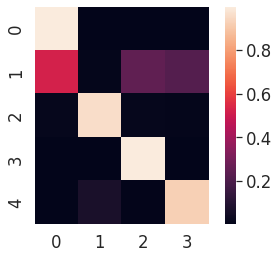

In [135]:
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.5)
sns.heatmap(data=probs,square=True) 